In [2]:
# Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, precision_recall_curve 
)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import os 
import joblib
#from utils import funcoes_avaliacao as funcoes_avaliacao

from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def save_model(model, model_name):
    model_path = os.path.join("../", "models", f"{model_name}_eng_feat.pkl")
    joblib.dump(model, model_path)
    print(f"Modelo {model_name} salvo em {model_path}")

In [3]:
import sys
import os

# Caminho da pasta 'utils', uma pasta acima do notebook
utils_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'utils'))

# Adiciona ao sys.path se ainda não estiver
if utils_path not in sys.path:
    sys.path.append(utils_path)

# Importa o módulo
import funcoes_avaliacao as funcoes_avaliacao


In [4]:
# Carregar e preparar dados
df_processed = pd.read_csv('C:/Users/Marcelo Almeida/Documents/TRABALHO DE CONCLUSÃO DE CURSO/projeto-tcc/data/processed/eng_features/aneel_processed_modelagem_eng_feat.csv', encoding='utf-8-sig')
#df_processed = df_processed[['distribuidora_codificado','duracao_fila','duracao_atendimento','operacao_codificado','skill_codificado','hora','flag_pesquisa','resposta_1','resposta_2','resposta_3','rechamou_30min','media_rechamada_agente','media_rechamada_agente_7d','media_rechamada_agente_15d','media_rechamada_agente_30d','media_rechamada_cliente', 'media_tempo_entre_chamadas','media_tempo_entre_chamadas_7d','media_tempo_entre_chamadas_15d','media_tempo_entre_chamadas_30d']]
#df_processed = df_processed[['distribuidora_codificado','duracao_fila','duracao_atendimento','operacao_codificado','short_call_30s','skill_codificado','hora','flag_pesquisa','resposta_1','resposta_2','resposta_3','rechamou_30min','media_rechamada_agente','media_rechamada_cliente', 'media_tempo_entre_chamadas','periodo','dia_semana_num','dia_de_semana','finalizacao_codificado']]
df_processed = df_processed[['distribuidora_codificado','duracao_fila','duracao_atendimento','operacao_codificado','short_call_30s','skill_codificado','hora','flag_pesquisa','resposta_1','resposta_2','resposta_3','rechamou_30min','media_rechamada_agente','media_rechamada_cliente', 'media_tempo_entre_chamadas','periodo','dia_semana_num','dia_de_semana','finalizacao_codificado']]

X = df_processed.drop(columns=['rechamou_30min'])
y = df_processed['rechamou_30min']

In [4]:
cor_target = df_processed.corr()["rechamou_30min"].sort_values(ascending=False)
print(cor_target.head(10))  # top 10

rechamou_30min              1.000000
short_call_30s              0.536793
media_rechamada_agente      0.240345
media_rechamada_cliente     0.073221
duracao_fila                0.064892
skill_codificado            0.040253
resposta_3                  0.024704
dia_de_semana               0.019866
distribuidora_codificado    0.013104
hora                        0.002437
Name: rechamou_30min, dtype: float64


In [5]:
#Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_res, y_res = X_train, y_train

In [8]:
#X_res, y_res = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X, y)
#X_res, y_res = SMOTE(sampling_strategy=1.0, random_state=42).fit_resample(X_train, y_train)
"""
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

smote = SMOTE(random_state=42, sampling_strategy=0.3)
X_res, y_res = smote.fit_resample(X_train, y_train)"""

"\nimputer = SimpleImputer(strategy='mean')\nX_train = imputer.fit_transform(X_train)\n\nsmote = SMOTE(random_state=42, sampling_strategy=0.3)\nX_res, y_res = smote.fit_resample(X_train, y_train)"

In [8]:
X_train = X_train.fillna(0)
X_train.isna().sum()

distribuidora_codificado      0
duracao_fila                  0
duracao_atendimento           0
operacao_codificado           0
short_call_30s                0
skill_codificado              0
hora                          0
flag_pesquisa                 0
resposta_1                    0
resposta_2                    0
resposta_3                    0
media_rechamada_agente        0
media_rechamada_cliente       0
media_tempo_entre_chamadas    0
periodo                       0
dia_semana_num                0
dia_de_semana                 0
finalizacao_codificado        0
dtype: int64

In [9]:
#Treinar modelos
modelos = {
    'XGBoost': XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=3.0), #, scale_pos_weight=3.0
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42,scale_pos_weight=3.0)#, is_unbalance=True
}

In [ ]:
#Treinar modelos
modelos = {
    'XGBoost': XGBClassifier(n_jobs=-1, use_label_encoder=False, eval_metric='logloss', random_state=42,scale_pos_weight=3.0), #, scale_pos_weight=3.0
    'LightGBM': LGBMClassifier(n_jobs=-1, random_state=42,scale_pos_weight=3.0), #, is_unbalance=True
    'CatBoost': CatBoostClassifier(verbose=0, random_seed=42,thread_count=-1, class_weights=[1, 3.0]),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, class_weight={0:1, 1:3.0})
}

In [6]:
modelos = {
    'XGBoost': XGBClassifier(
        scale_pos_weight=2.9,  # Ajuste este valor!
        max_depth=6,
        learning_rate=0.1,
        n_estimators=200,
        reg_alpha=0.1,
        subsample=0.8,      
        colsample_bytree=0.8,
        n_jobs=-1,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    
    'LightGBM': LGBMClassifier(
        scale_pos_weight=2.9,  # Mesmo valor
        max_depth=6,
        learning_rate=0.1,
        n_estimators=200,
        reg_alpha=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        num_leaves=31,
        n_jobs=-1,
        random_state=42
    )
}

Treinando XGBoost:2025-10-14 20:44:13


c:\Users\Marcelo Almeida\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tempo de treinamento do modelo XGBoost: 0:00:27.421436
Resultados do modelo XGBoost:

🔍 XGBoost
Accuracy: 0.8745
Precision: 0.6712
Recall: 0.6954
F1 Score: 0.6831
AUC: 0.8878

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92    822695
           1       0.67      0.70      0.68    198647

    accuracy                           0.87   1021342
   macro avg       0.80      0.81      0.80   1021342
weighted avg       0.88      0.87      0.88   1021342



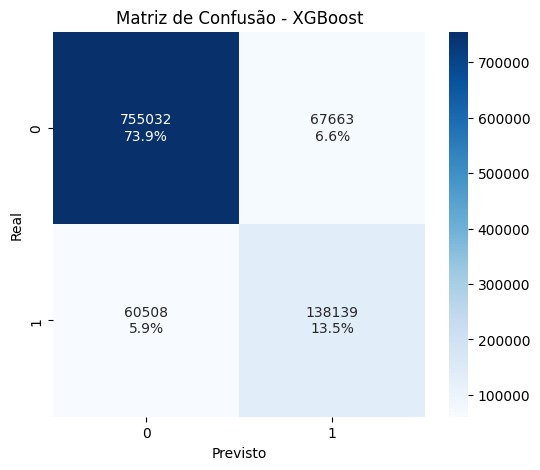

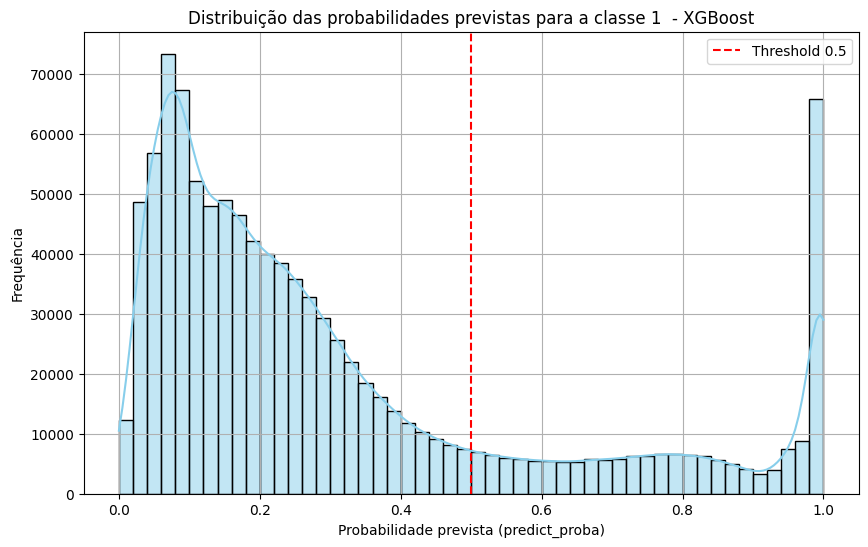

----------------------------------------------------------------------------
Treinando LightGBM:2025-10-14 20:44:48
[LightGBM] [Info] Number of positive: 795405, number of negative: 3289960
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.144095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 4085365, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.194696 -> initscore=-1.419779
[LightGBM] [Info] Start training from score -1.419779
Tempo de treinamento do modelo LightGBM: 0:00:22.917585
Resultados do modelo LightGBM:

🔍 LightGBM
Accuracy: 0.8742
Precision: 0.6706
Recall: 0.6941
F1 Score: 0.6822
AUC: 0.8871

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92    822695
         

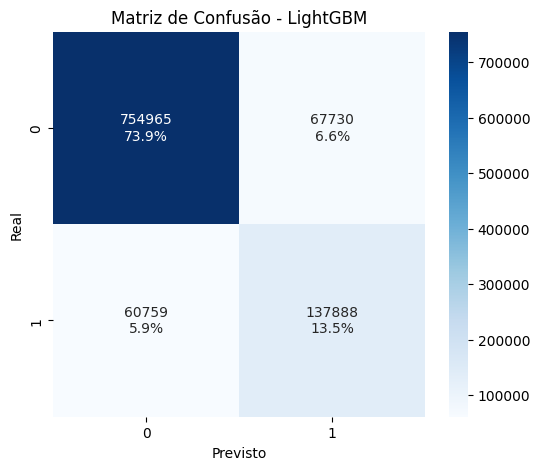

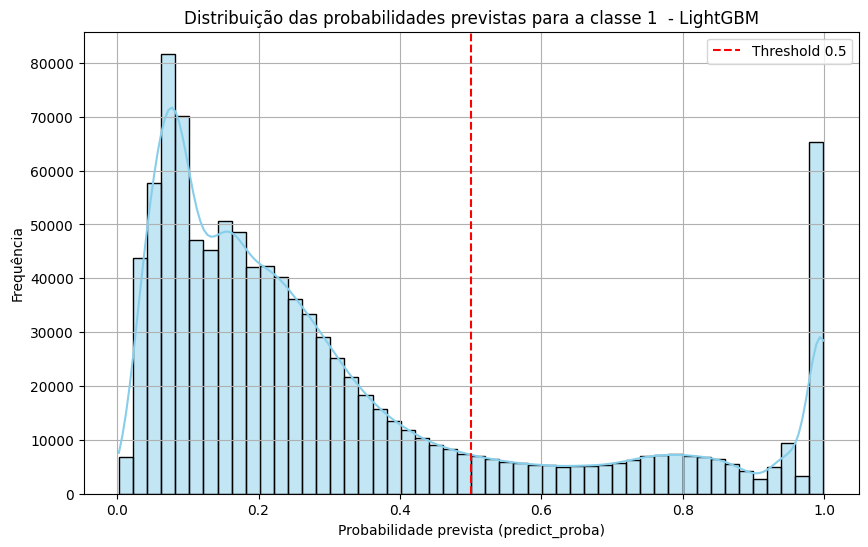

----------------------------------------------------------------------------


In [10]:
resultados = []
modelos_treinados = {}

for nome, modelo in modelos.items():
    inicio_treino = dt.datetime.now()
    print(f"Treinando {nome}:{inicio_treino.strftime("%Y-%m-%d %H:%M:%S")}")
    cat_features = ['distribuidora_codificado', 'operacao_codificado', 'skill_codificado']
    if nome == 'CatBoost':
        modelo.fit(X_res, y_res, cat_features=cat_features)
    else:
        modelo.fit(X_res, y_res)

    # ⬇️ Armazenando modelo treinado
    modelos_treinados[nome] = modelo
        
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:,1]
    #save_model(modelo, nome)
    # tempo de treinamento
    fim_treino = dt.datetime.now()
    tempo_treino = fim_treino - inicio_treino
    print(f"Tempo de treinamento do modelo {nome}: {tempo_treino}")
    print(f"Resultados do modelo {nome}:")
    funcoes_avaliacao.avaliar_modelo(nome, y_test, y_pred, y_prob)
    funcoes_avaliacao.plot_matriz_confusao(y_test, y_pred, nome)
    funcoes_avaliacao.plot_distribuicao_probabilidades(nome,y_prob)

    print(f"----------------------------------------------------------------------------")

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob)
    })

In [12]:
for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:,1]
    y_proba = modelo.predict_proba(X_valid)[:,1]  # LightGBM ou XGB
    prec, rec, thr = precision_recall_curve(y_valid, y_proba)

    # Ex.: escolher threshold que maximiza F1
    f1 = 2*(prec*rec)/(prec+rec+1e-12)
    best_idx = np.argmax(f1)
    best_thr = thr[best_idx]

    y_pred = (y_proba >= best_thr).astype(int)
    print("Best threshold:", best_thr)
    print("F1:", f1[best_idx], "Precision:", prec[best_idx], "Recall:", rec[best_idx])
    print(classification_report(y_valid, y_pred))

NameError: name 'X_valid' is not defined

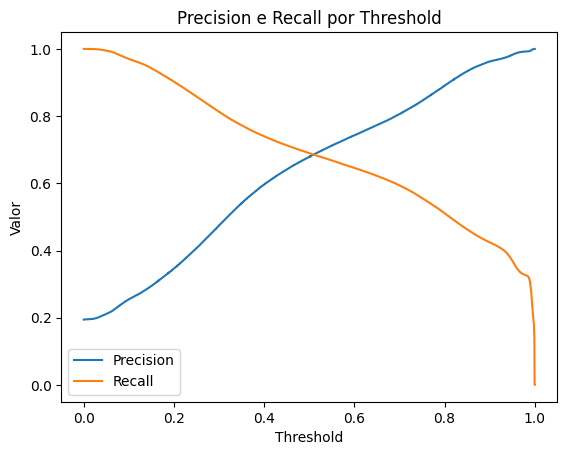

In [10]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Valor')
plt.title('Precision e Recall por Threshold')
plt.legend()
plt.show()


🔧 Threshold = 0.52
Precision: 0.6924860639751839
Recall: 0.6810170805499202
F1 Score: 0.6867036882874286
AUC: 0.8876105226375541


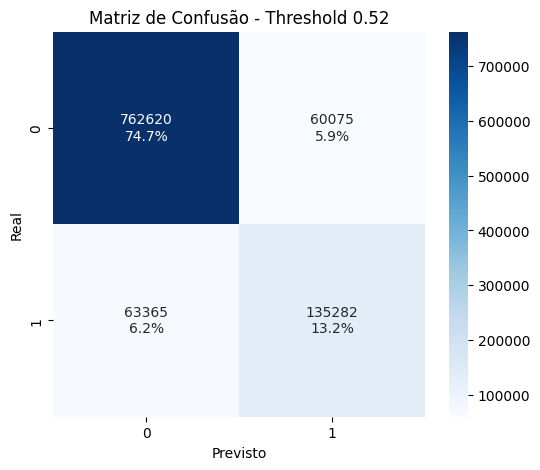

In [17]:
funcoes_avaliacao.avaliar_threshold(y_test, y_prob, threshold=0.52)
#plot_matriz_confusao2(y_test, y_pred, 'catboost')


--- Comparação geral dos modelos ---


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC
0,XGBoost,0.874507,0.671223,0.695399,0.683097,0.887827
1,LightGBM,0.874196,0.670603,0.694136,0.682166,0.887063
2,CatBoost,0.874432,0.670208,0.697725,0.683690,0.888145
3,Random Forest,0.892755,0.849789,0.544921,0.664035,0.875961


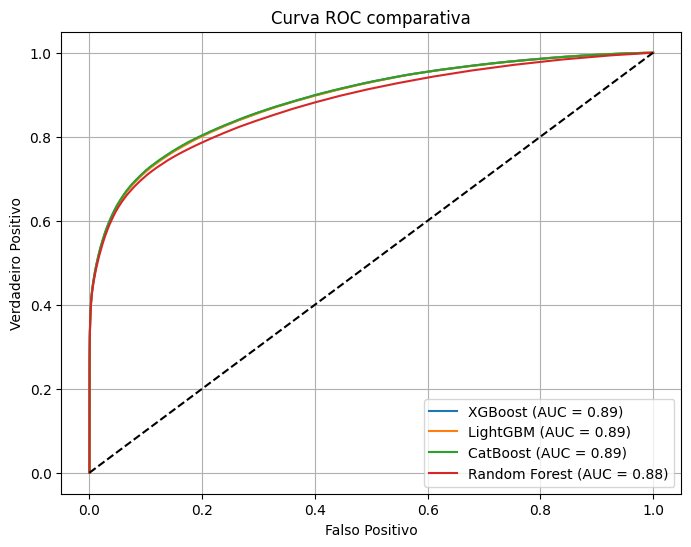

In [13]:
#Comparar resultados em tabela
df_resultados = pd.DataFrame(resultados)
print("\n--- Comparação geral dos modelos ---")
display(df_resultados)

# 06 - Plotar curva ROC comparativa
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for nome, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Cria um DataFrame para facilitar a análise
df_result = pd.DataFrame({
    'y_prob': y_prob,
    'y_true': y_test
})

# Filtra os exemplos com alta confiança
df_confident = df_result[df_result['y_true'] == 1]

In [ ]:
# Alinha os dados de entrada com os índices confiantes
X_confident = X_test.loc[df_confident.index]

# Junta todas as colunas (features + y_true + y_prob)
df_confident_full = pd.concat([X_confident, df_confident], axis=1)
df_confident_full

,distribuidora_codificado,duracao_fila,duracao_atendimento,operacao_codificado,short_call_30s,skill_codificado,hora,flag_pesquisa,resposta_1,resposta_2,resposta_3,media_rechamada_agente,media_rechamada_cliente,media_tempo_entre_chamadas,periodo,dia_semana_num,dia_de_semana,finalizacao_codificado,y_prob,y_true
623747,1,11,9,2,1,24,7,0,0,0,0,0.457399,0.380952,7421.950585,0,3,1,1,0.999064,1
687471,5,11,8,1,1,24,13,0,0,0,0,0.640411,0.000000,468769.700000,1,4,1,1,0.998883,1
1433984,5,15,12,1,1,24,10,0,0,0,0,0.855170,0.333333,79187.491667,0,1,1,1,0.999122,1
2241646,1,170,12,2,1,12,18,0,0,0,0,0.727790,0.000000,480689.766667,2,2,1,1,0.991110,1
1289399,9,78,12,1,1,12,6,0,0,0,0,0.693820,0.666667,26206.975926,0,4,1,1,0.996017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539677,1,0,234,2,0,24,12,1,0,0,0,0.397094,0.000000,NaN,1,3,1,6,0.147845,1
1175540,17,13,12,1,1,24,12,0,0,0,0,0.860009,0.456410,1822.142234,1,1,1,5,0.862384,1
1962798,1,0,337,2,0,24,20,0,0,0,0,0.535780,0.000000,258.000000,2,1,1,5,0.292848,1
320244,5,21,8,2,1,24,13,0,0,0,0,0.373333,1.000000,NaN,1,1,1,1,0.998479,1


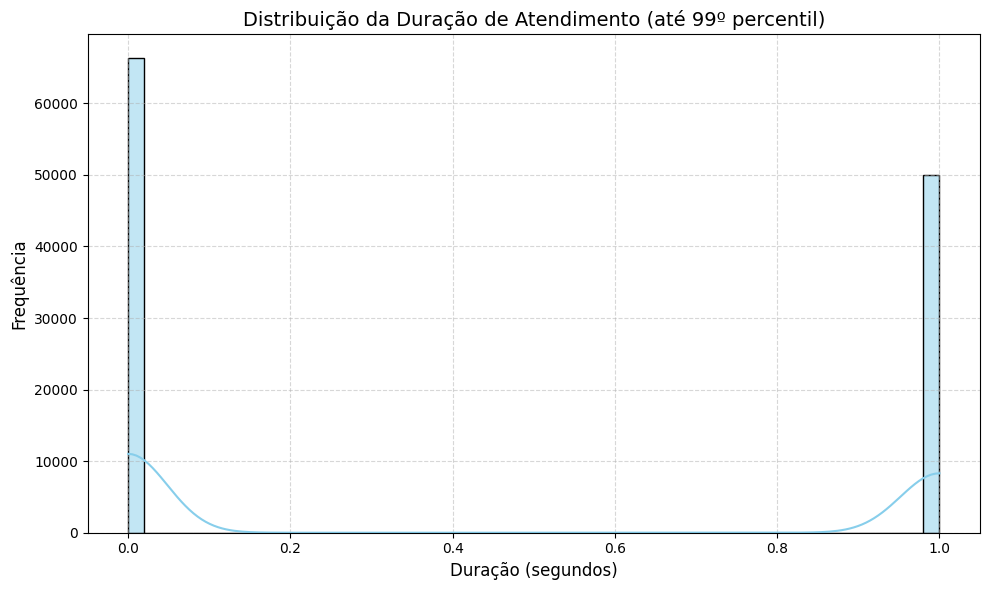

short_call_30s
0    0.570278
1    0.429722
Name: proportion, dtype: float64

In [ ]:
# Suponha que df['short_call_30s'] contenha os dados
coluna = df_confident_full['short_call_30s']

# Limitar os outliers para uma visualização mais clara (ex: abaixo do percentil 99)
limite = np.percentile(coluna, 99)

plt.figure(figsize=(10, 6))
sns.histplot(coluna[coluna <= limite], bins=50, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribuição da Duração de Atendimento (até 99º percentil)", fontsize=14)
plt.xlabel("Duração (segundos)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
df_confident_full['short_call_30s'].value_counts(normalize=True)


In [ ]:
# Obter importâncias
importancias = modelo.get_feature_importance()
nomes_features = X_train.columns

# Plotar
plt.figure(figsize=(10,6))
plt.barh(nomes_features, importancias)
plt.xlabel("Importância")
plt.title("Importância das Features - CatBoost")
plt.gca().invert_yaxis()
plt.show()

AttributeError: 'LGBMClassifier' object has no attribute 'get_feature_importance'

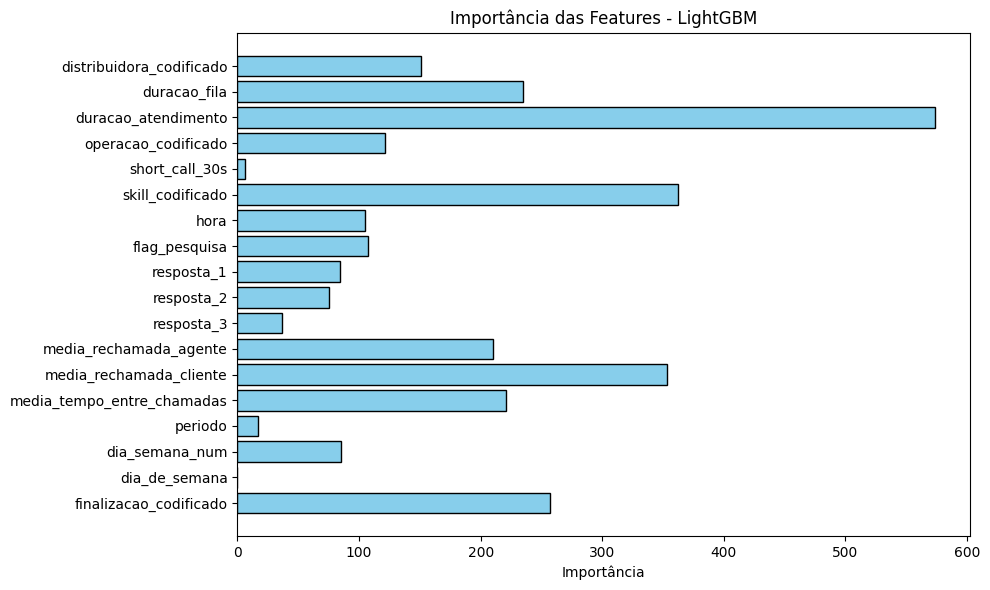

In [ ]:
# Obter importâncias
importancias = modelos_treinados['LightGBM'].feature_importances_
nomes_features = X_train.columns

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias, color='skyblue', edgecolor='black')
plt.xlabel("Importância")
plt.title("Importância das Features - LightGBM")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

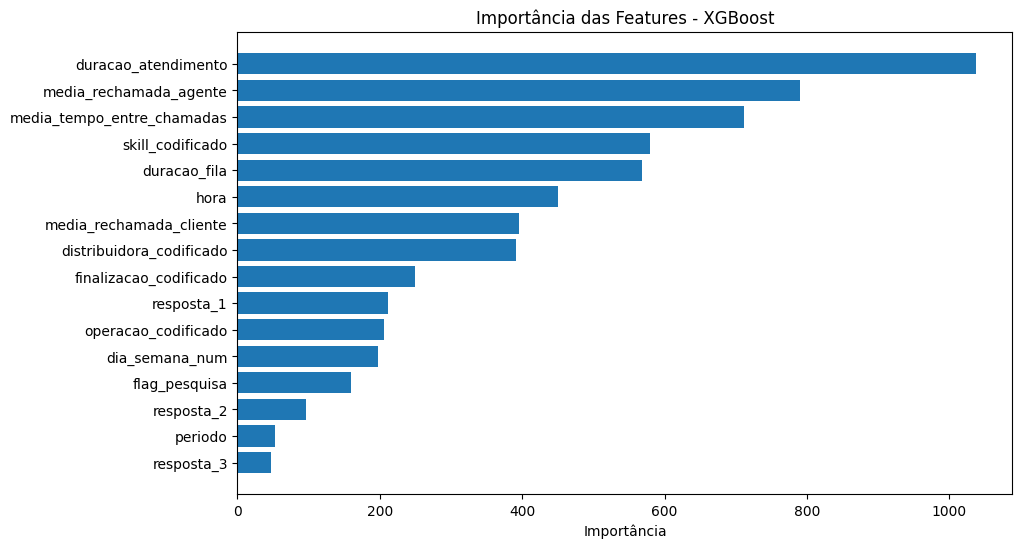

In [11]:
# Obter importâncias
importancias_dict = modelos_treinados['XGBoost'].get_booster().get_score(importance_type='weight')

# Converter para DataFrame e ordenar
importancias_df = (
    pd.DataFrame(list(importancias_dict.items()), columns=['Feature', 'Importância'])
    .sort_values(by='Importância', ascending=False)
)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Feature'], importancias_df['Importância'])
plt.xlabel("Importância")
plt.title("Importância das Features - XGBoost")
plt.gca().invert_yaxis()  # inverte o eixo Y para mostrar do maior para o menor
plt.show()

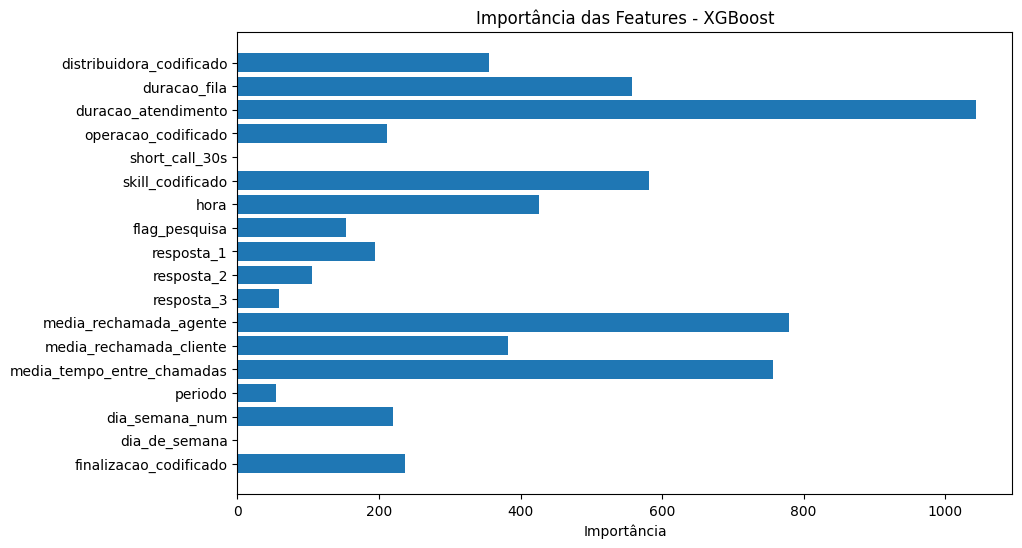

In [ ]:
# Obter importâncias
importancias_dict = modelos_treinados['XGBoost'].get_booster().get_score(importance_type='weight')
# Convertendo para lista na mesma ordem de X_train.columns
importancias = [importancias_dict.get(f, 0) for f in X_train.columns]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importancias)
plt.xlabel("Importância")
plt.title("Importância das Features - XGBoost")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import shap

# Criar objeto explainer
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)

# Plotar explicação global
shap.summary_plot(shap_values, X_test)

c:\Users\Marcelo Almeida\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 